# Introduction to convolution neural networks

computer vision in practice of writing algorithms which can discover patterns in visual data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref= zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-08-10 08:34:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  51.8MB/s    in 2.0s    

2023-08-10 08:34:28 (51.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

a=os.walk("pizza_steak")

In [6]:
a

<generator object _walk at 0x7a43153e14d0>

In [7]:
for dirpath, dirname, filename in os.walk("pizza_steak"):
  print(f"There are {len(dirname)} directories and {len(filename)} images in '{dirpath}'. ")

There are 2 directories and 0 images in 'pizza_steak'. 
There are 2 directories and 0 images in 'pizza_steak/train'. 
There are 0 directories and 750 images in 'pizza_steak/train/pizza'. 
There are 0 directories and 750 images in 'pizza_steak/train/steak'. 
There are 2 directories and 0 images in 'pizza_steak/test'. 
There are 0 directories and 250 images in 'pizza_steak/test/pizza'. 
There are 0 directories and 250 images in 'pizza_steak/test/steak'. 


In [8]:
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names= np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder= target_dir+"/"+ target_class
  random_image= random.sample(os.listdir(target_folder),1)
  name=target_folder+"/"+random_image[0]
  # print(name)
  img= plt.imread(name)
  # plt.imshow(random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"image shape: {img.shape}")
  # return name
  return img

image shape: (512, 512, 3)


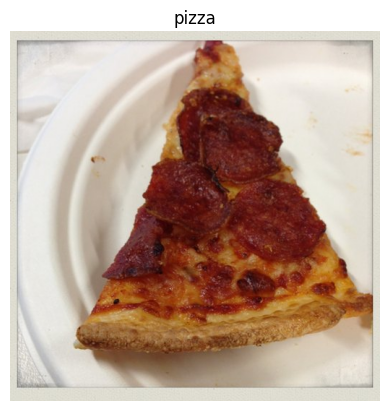

In [10]:
img=view_random_image("pizza_steak/train", "pizza")

In [11]:
img

array([[[223, 221, 209],
        [224, 222, 210],
        [225, 223, 211],
        ...,
        [229, 227, 215],
        [227, 225, 213],
        [222, 220, 208]],

       [[223, 221, 209],
        [223, 221, 209],
        [224, 222, 210],
        ...,
        [226, 224, 212],
        [226, 224, 212],
        [224, 222, 210]],

       [[223, 221, 209],
        [224, 222, 210],
        [224, 222, 210],
        ...,
        [222, 220, 208],
        [224, 222, 210],
        [223, 221, 209]],

       ...,

       [[220, 220, 208],
        [219, 219, 207],
        [218, 218, 206],
        ...,
        [221, 219, 207],
        [223, 221, 209],
        [221, 219, 207]],

       [[221, 221, 209],
        [220, 220, 208],
        [220, 220, 208],
        ...,
        [223, 221, 209],
        [225, 223, 211],
        [223, 221, 209]],

       [[222, 222, 210],
        [222, 222, 210],
        [222, 222, 210],
        ...,
        [221, 219, 207],
        [224, 222, 210],
        [221, 219, 207]]

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[223, 221, 209],
        [224, 222, 210],
        [225, 223, 211],
        ...,
        [229, 227, 215],
        [227, 225, 213],
        [222, 220, 208]],

       [[223, 221, 209],
        [223, 221, 209],
        [224, 222, 210],
        ...,
        [226, 224, 212],
        [226, 224, 212],
        [224, 222, 210]],

       [[223, 221, 209],
        [224, 222, 210],
        [224, 222, 210],
        ...,
        [222, 220, 208],
        [224, 222, 210],
        [223, 221, 209]],

       ...,

       [[220, 220, 208],
        [219, 219, 207],
        [218, 218, 206],
        ...,
        [221, 219, 207],
        [223, 221, 209],
        [221, 219, 207]],

       [[221, 221, 209],
        [220, 220, 208],
        [220, 220, 208],
        ...,
        [223, 221, 209],
        [225, 223, 211],
        [223, 221, 209]],

       [[222, 222, 210],
        [222, 222, 210],
        [222, 222, 210],
        ...,
        [221, 219, 20

In [13]:
# %%time
img.min(), img.max()

(0, 252)

In [14]:
img/255.

array([[[0.8745098 , 0.86666667, 0.81960784],
        [0.87843137, 0.87058824, 0.82352941],
        [0.88235294, 0.8745098 , 0.82745098],
        ...,
        [0.89803922, 0.89019608, 0.84313725],
        [0.89019608, 0.88235294, 0.83529412],
        [0.87058824, 0.8627451 , 0.81568627]],

       [[0.8745098 , 0.86666667, 0.81960784],
        [0.8745098 , 0.86666667, 0.81960784],
        [0.87843137, 0.87058824, 0.82352941],
        ...,
        [0.88627451, 0.87843137, 0.83137255],
        [0.88627451, 0.87843137, 0.83137255],
        [0.87843137, 0.87058824, 0.82352941]],

       [[0.8745098 , 0.86666667, 0.81960784],
        [0.87843137, 0.87058824, 0.82352941],
        [0.87843137, 0.87058824, 0.82352941],
        ...,
        [0.87058824, 0.8627451 , 0.81568627],
        [0.87843137, 0.87058824, 0.82352941],
        [0.8745098 , 0.86666667, 0.81960784]],

       ...,

       [[0.8627451 , 0.8627451 , 0.81568627],
        [0.85882353, 0.85882353, 0.81176471],
        [0.85490196, 0

## An end to end example

* Load our images
* Preprocess them
* Build a CNN to find patterns in the images
* Compile our own CNN
* Fit the CNN to our training data


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255.)
val_datagen=ImageDataGenerator(rescale=1./255.)

train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

train_data= train_datagen.flow_from_directory(train_dir,          # creates data and labels both
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)
val_data= val_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

model1= tf.keras.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=10,
                                  kernel_size=3,
                                  activation="relu",
                                  input_shape=(224,224,3)))
model1.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(pool_size=2,
                          padding="valid"))
model1.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model1.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(2,padding="valid"))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(1, activation="sigmoid"))


model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_1= model1.fit(train_data, epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data= val_data,
                      validation_steps= len(val_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 145ms/step - loss: 0.5817 - accuracy: 0.7047 - val_loss: 0.4606 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 0.4530 - accuracy: 0.7900 - val_loss: 0.3843 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4333 - accuracy: 0.8067 - val_loss: 0.3914 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 6s 137ms/step - loss: 0.3947 - accuracy: 0.8287 - val_loss: 0.3366 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3462 - accuracy: 0.8587 - val_loss: 0.3813 - val_accuracy: 0.8300


In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Relicating old tf model to fit with image dataset

In [17]:
tf.random.set_seed(42)

model2=tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(224,224,3)))
model2.add(tf.keras.layers.Dense(8, activation=tf.keras.activations.relu))
model2.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid))

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history2=model2.fit(train_data, epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=val_data,
                    validation_steps=len(val_data))

Epoch 1/5
47/47 [==============================] - 7s 125ms/step - loss: 1.8074 - accuracy: 0.6407 - val_loss: 0.7145 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.8670 - accuracy: 0.7207 - val_loss: 0.6527 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.6507 - accuracy: 0.7567 - val_loss: 2.2025 - val_accuracy: 0.5260
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.8170 - accuracy: 0.7373 - val_loss: 0.9358 - val_accuracy: 0.7080
Epoch 5/5
47/47 [==============================] - 6s 128ms/step - loss: 0.7538 - accuracy: 0.7693 - val_loss: 1.1721 - val_accuracy: 0.7340


In [18]:
tf.random.set_seed(42)
model3=tf.keras.Sequential()
model3.add(tf.keras.layers.Flatten(input_shape=(224,224,3)))
model3.add(tf.keras.layers.Dense(100, activation="relu"))
model3.add(tf.keras.layers.Dense(100, activation="relu"))
model3.add(tf.keras.layers.Dense(100, activation="relu"))
model3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

history3=model3.fit(train_data, epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=val_data,
                    validation_steps=len(val_data))

Epoch 1/5
47/47 [==============================] - 8s 131ms/step - loss: 52.4050 - accuracy: 0.5667 - val_loss: 1.0349 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.7159 - accuracy: 0.6980 - val_loss: 0.6668 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 7s 154ms/step - loss: 0.6279 - accuracy: 0.7327 - val_loss: 1.3384 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.5250 - accuracy: 0.7693 - val_loss: 0.5956 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 6s 130ms/step - loss: 0.5078 - accuracy: 0.7973 - val_loss: 0.5800 - val_accuracy: 0.7160


In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 8)                 1204232   
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,204,241
Trainable params: 1,204,241
Non-trainable params: 0
_________________________________________________________________


In [20]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [21]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## 1. Become one with the data

image shape: (512, 512, 3)
image shape: (287, 512, 3)


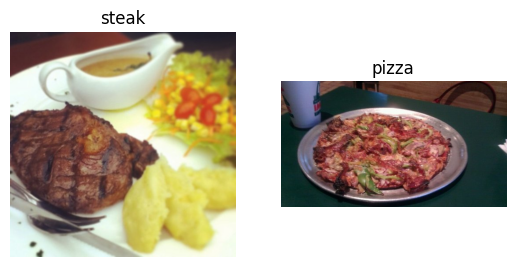

In [22]:
plt.figure()
plt.subplot(1,2,1)
steak_img= view_random_image("pizza_steak/train", "steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train", "pizza")

## 2. Preprocess the data

In [23]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

Turing data into **batches**

In [24]:
!nvidia-smi

Thu Aug 10 08:36:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    34W /  70W |   2955MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

In [26]:
train_data= train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)

test_data= test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
images, labels= train_data.next()
len(images), len(labels)

(32, 32)

In [28]:
images[0], images[0].shape

(array([[[0.47058827, 0.40784317, 0.34509805],
         [0.48627454, 0.42352945, 0.36078432],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.82745105, 0.7137255 , 0.48627454],
         [0.8431373 , 0.7372549 , 0.5294118 ],
         [0.87843144, 0.77647066, 0.58431375]],
 
        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.49803925],
         [0.8431373 , 0.73333335, 0.5372549 ]],
 
        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.4901961 ],
         [0.8352942 , 0.7176471 , 0.5137255 ]],
 
        ...,
 
        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.77647066, 0.53333336, 0.23137

In [29]:
labels[0]

1.0

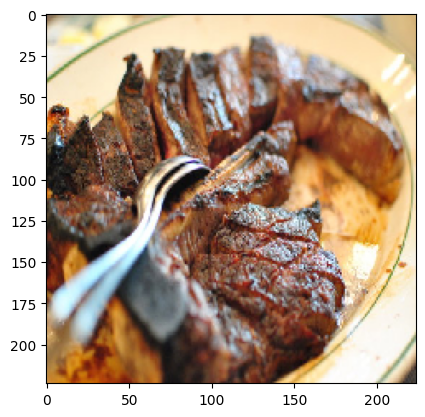

In [30]:
plt.imshow(images[0])

## 3. Create a CNN model

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import Sequential

In [32]:
tf.random.set_seed(42)
model4=Sequential()
model4.add(Conv2D(filters=10,
                  kernel_size=3,
                  strides=1,
                  padding="valid",
                  activation="relu",
                  input_shape=(224,224,3)))
model4.add(Conv2D(10,3,activation="relu"))
model4.add(Conv2D(10,3,activation="relu"))
model4.add(Flatten())
model4.add(Dense(1, activation="sigmoid"))


model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=Adam(),
               metrics=["accuracy"])

history4 = model4.fit(train_data, epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 159ms/step - loss: 1.1006 - accuracy: 0.6040 - val_loss: 0.5156 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4583 - accuracy: 0.8000 - val_loss: 0.4289 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 6s 137ms/step - loss: 0.3706 - accuracy: 0.8400 - val_loss: 0.4109 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.2550 - accuracy: 0.9033 - val_loss: 0.4035 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 7s 139ms/step - loss: 0.1816 - accuracy: 0.9453 - val_loss: 0.4421 - val_accuracy: 0.8140


In [33]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [34]:
len(train_data), len(test_data)

(47, 16)

<Axes: >

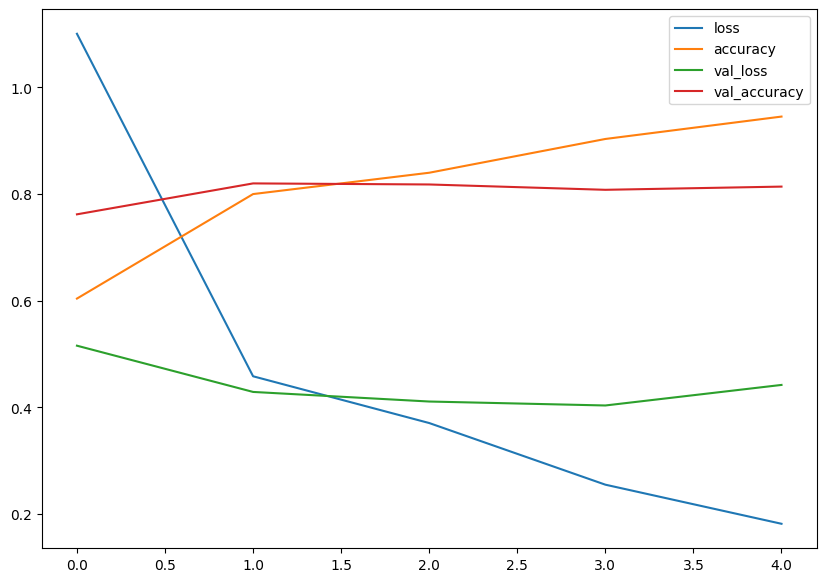

In [35]:
import pandas as pd
pd.DataFrame(history4.history).plot(figsize=(10,7))

In [36]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

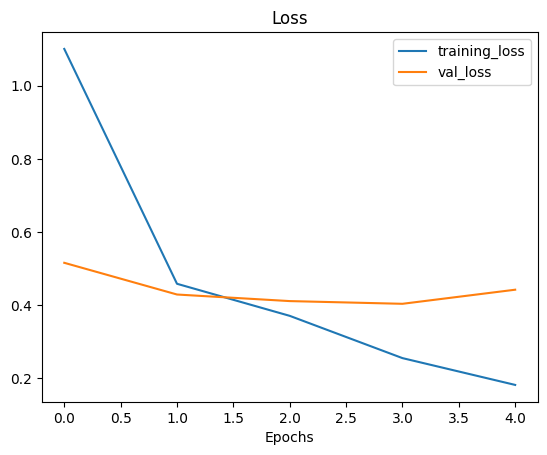

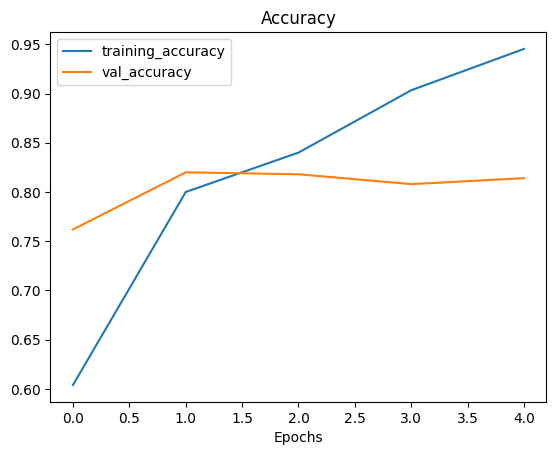

In [37]:
plot_loss_curves(history4)

### 6. Adjust the model params

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add a another dense layer to the output of our flattened layer

Ways to reduce overfitting:
* Add augumentation
* Add regulation layers like maxpool2d
* Add more data...

reducing overfitting-> **regularization**

In [38]:
tf.random.set_seed(42)
model5= Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model5.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])
history5=model5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 128ms/step - loss: 0.6386 - accuracy: 0.6353 - val_loss: 0.4514 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4620 - accuracy: 0.7907 - val_loss: 0.3564 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4146 - accuracy: 0.8227 - val_loss: 0.3477 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4133 - accuracy: 0.8160 - val_loss: 0.3898 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.3969 - accuracy: 0.8227 - val_loss: 0.3252 - val_accuracy: 0.8720


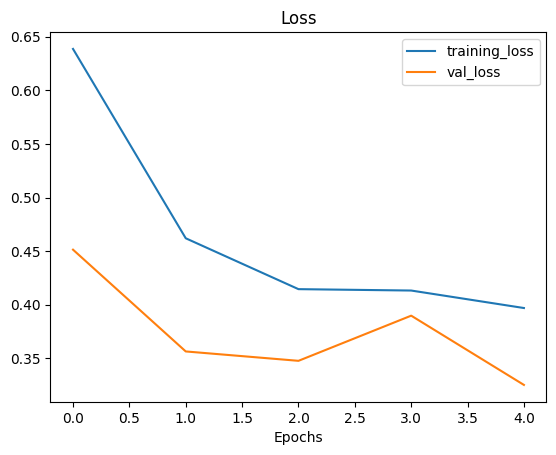

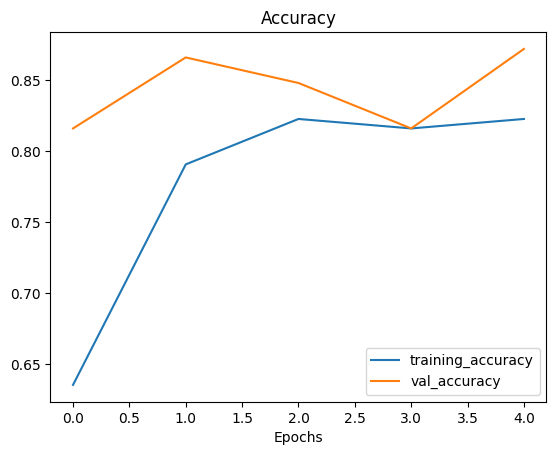

In [39]:
plot_loss_curves(history5)

## Data Augmentation

In [40]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)

train_datagen=ImageDataGenerator(rescale=1/255.)

test_datagen=ImageDataGenerator(rescale=1/255.)


In [41]:
print("Augmented Training Data")
train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir, target_size=(224,224),batch_size=32, class_mode="binary",shuffle=True)
print("Training Data (non-Augmented)")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=True)

print("Non Augmented Test Data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary",
                                           shuffle=True)

Augmented Training Data
Found 1500 images belonging to 2 classes.
Training Data (non-Augmented)
Found 1500 images belonging to 2 classes.
Non Augmented Test Data
Found 500 images belonging to 2 classes.


## Visualizing Augmented Data

In [42]:
image, labels= train_data.next()
aug_image, aug_labels=train_data_augmented.next()

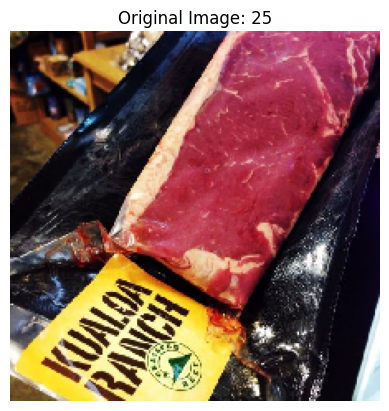

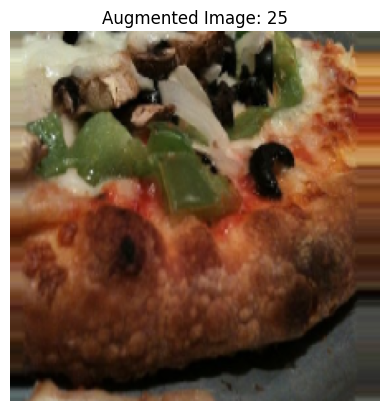

In [43]:
import random
rand_num=random.randint(0,32)
plt.title(f"Original Image: {rand_num}")
plt.imshow(image[rand_num])
plt.axis(False)
plt.figure()
plt.title(f"Augmented Image: {rand_num}")
plt.axis(False)
plt.imshow(aug_image[rand_num])

In [44]:
tf.random.set_seed(42)
model6=Sequential()
model6.add(Conv2D(10,3,activation="relu", input_shape=(224,224,3)))
model6.add(MaxPool2D(2))
model6.add(Conv2D(10,3,activation="relu"))
model6.add(MaxPool2D())
model6.add(Conv2D(10,3,activation="relu"))
model6.add(MaxPool2D())
model6.add(Flatten())
model6.add(Dense(1,activation="sigmoid"))

model6.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

history6a=model6.fit(train_data,epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))
history6b=model6.fit(train_data_augmented,epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 114ms/step - loss: 0.6593 - accuracy: 0.5913 - val_loss: 0.5381 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 7s 153ms/step - loss: 0.4839 - accuracy: 0.7747 - val_loss: 0.3929 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4461 - accuracy: 0.7987 - val_loss: 0.3783 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4218 - accuracy: 0.8080 - val_loss: 0.3446 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3937 - accuracy: 0.8187 - val_loss: 0.3660 - val_accuracy: 0.8380
Epoch 1/5
47/47 [==============================] - 21s 443ms/step - loss: 0.4995 - accuracy: 0.7653 - val_loss: 0.3824 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 21s 456ms/step - loss: 0.4566 - accuracy: 0.7913 - val_loss: 0.3363 - val_accuracy: 0.8520
Epoch 3/5
4

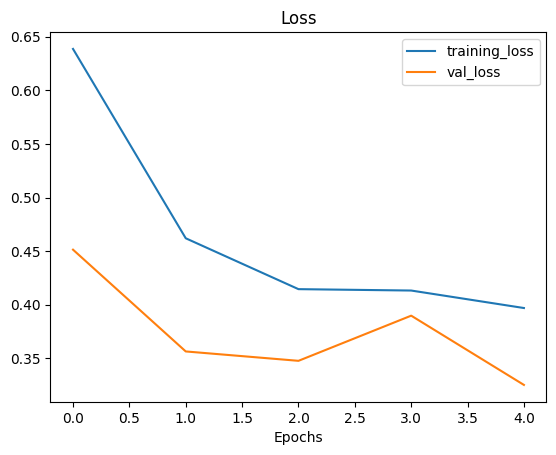

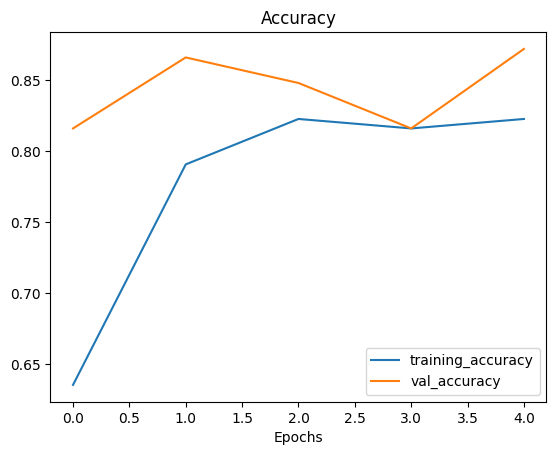

In [45]:
plot_loss_curves(history5)

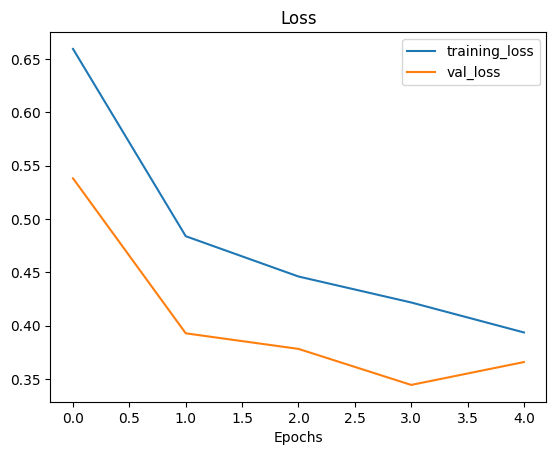

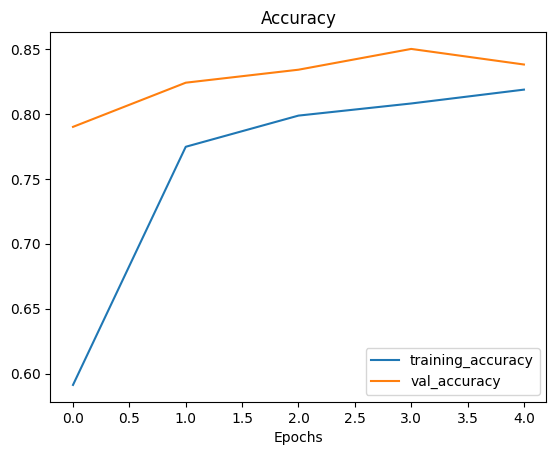

In [46]:
plot_loss_curves(history6a)

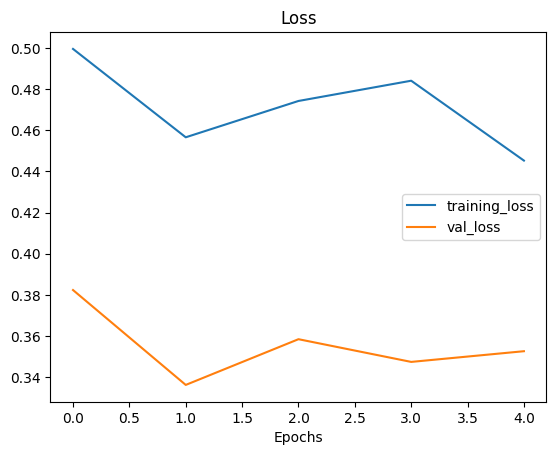

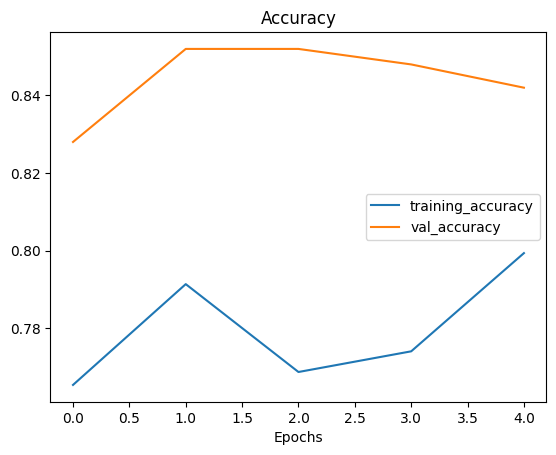

In [47]:
plot_loss_curves(history6b)

### 7. Repeat untill satisfied

In [60]:
model7= Sequential()
model7.add(Conv2D(32,3,activation="relu", input_shape=(224,224,3)))
model7.add(MaxPool2D())
model7.add(Conv2D(32,3,activation="relu"))
model7.add(MaxPool2D())
model7.add(Conv2D(32,3,activation="relu"))
model7.add(MaxPool2D())
model7.add(Flatten())
model7.add(Dense(1, activation="sigmoid"))

model7.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

model7.fit(train_data_augmented,
           epochs=5,
           steps_per_epoch=len(train_data_augmented),
           validation_data=test_data,
           validation_steps=len(test_data))
history7=model7.fit(train_data,
           epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 33s 587ms/step - loss: 0.6558 - accuracy: 0.6027 - val_loss: 0.5474 - val_accuracy: 0.6940
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.5276 - accuracy: 0.7413 - val_loss: 0.3816 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 22s 461ms/step - loss: 0.4724 - accuracy: 0.7873 - val_loss: 0.3833 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 20s 430ms/step - loss: 0.4802 - accuracy: 0.7760 - val_loss: 0.3430 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 23s 484ms/step - loss: 0.4554 - accuracy: 0.7913 - val_loss: 0.3236 - val_accuracy: 0.8640
Epoch 1/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3852 - accuracy: 0.8407 - val_loss: 0.3238 - val_accuracy: 0.8800
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 0.3623 - accuracy: 0.8453 - val_loss: 0.3167 - val_accuracy: 0.8560
Epoch 3/

In [49]:
class_names

array(['pizza', 'steak'], dtype='<U5')

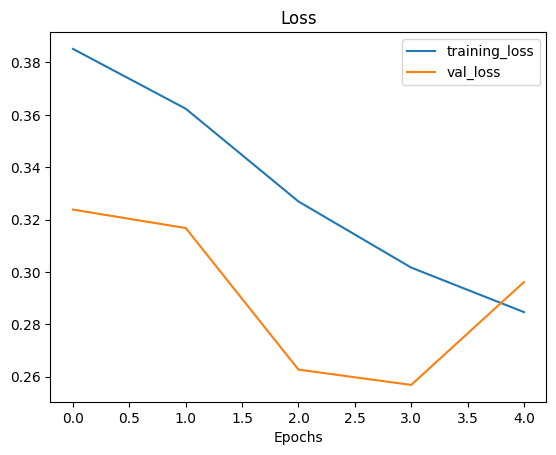

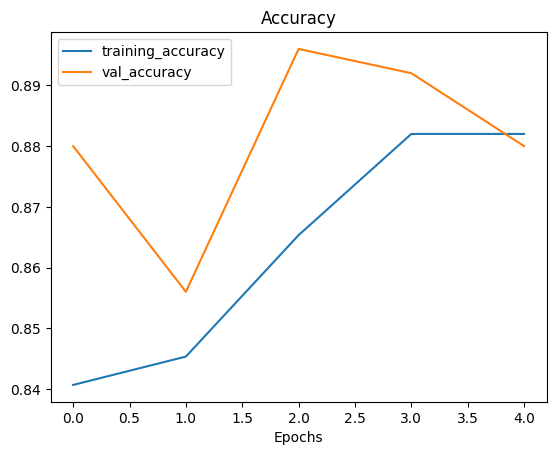

In [62]:
plot_loss_curves(history7)

In [50]:
import matplotlib.image as mpimg

In [52]:
pizza= mpimg.imread("pizza.jpeg")

In [125]:
pizza.shape

TensorShape([224, 224, 3])

(-0.5, 296.5, 168.5, -0.5)

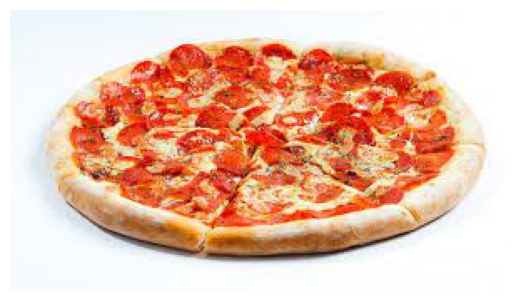

In [53]:
plt.imshow(pizza)
plt.axis(False)

In [54]:
pizza.shape

(169, 297, 3)

In [55]:
def load_and_prep(filename, img_shape=224):

  img=tf.io.read_file(filename)
  img= tf.image.decode_image(img)
  img=tf.image.resize(img, size=[img_shape, img_shape])
  img=img/255.
  return img

In [56]:
pizza=load_and_prep("pizza.jpeg")
expanded_img=tf.expand_dims(pizza,axis=0)

In [66]:
pred=model7.predict(expanded_img)

1/1 [==============================] - 0s 33ms/step


In [63]:
predict_label(model7.predict(expanded_img))

1/1 [==============================] - 0s 65ms/step


'Pizza'

In [68]:
pred_class= class_names[int(tf.round(pred))]
pred_class

'pizza'

In [70]:
class_names[pred.argmax()]

'pizza'

In [110]:
def pred_and_plot(model, filename, class_names=class_names):

  img= load_and_prep(filename)
  img=tf.expand_dims(img, axis=0)
  pred= model.predict(img)

  pred_class= class_names[pred.argmax()]

  img2=mpimg.imread(filename)

  plt.imshow(img2)
  plt.axis(False)
  plt.title(f"Predicted: {pred_class}")

1/1 [==============================] - 0s 21ms/step


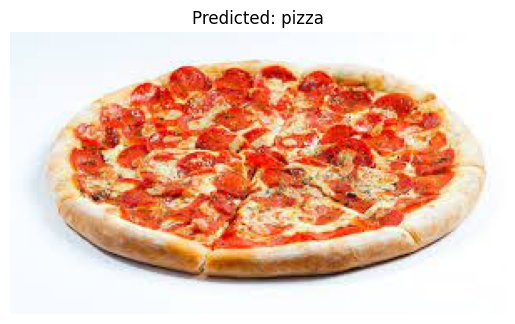

In [111]:
pred_and_plot(model=model7, filename="pizza.jpeg")

# Multiclass Image Classification

## 1. Become one with the data

In [112]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
#unzip

zip_ref= zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-08-10 09:22:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  96.0MB/s    in 8.0s    

2023-08-10 09:22:24 (62.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [113]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")

There are 2 directories and 0 images in '10_food_classes_all_data' 
There are 10 directories and 0 images in '10_food_classes_all_data/train' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak' 

In [114]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [115]:
import pathlib
import numpy as np
data_dir= pathlib.Path(train_dir)
class_names= np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


image shape: (512, 512, 3)


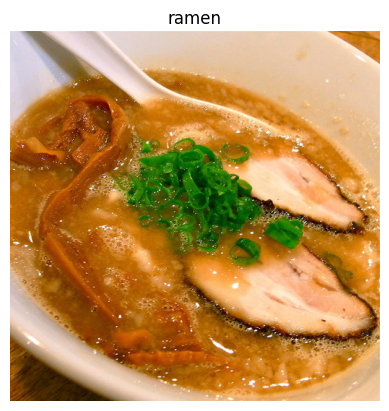

In [119]:
import random
img= view_random_image(target_dir=train_dir,
                       target_class=random.choice(class_names))

## 2. Preprocess the data

In [123]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1/255.,
                               rotation_range=0.2,
                               width_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               height_shift_range=0.2)

test_datagen= ImageDataGenerator(rescale=1/255.)

In [126]:
train_data= train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [127]:
len(class_names)

10

## 3. Create a model

In [128]:
model8= tf.keras.Sequential()
model8.add(tf.keras.layers.Conv2D(filters=10,
                                  kernel_size=3,
                                  activation="relu",
                                  input_shape=(224,224,3)))
model8.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model8.add(tf.keras.layers.MaxPool2D(pool_size=2))
model8.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model8.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model8.add(tf.keras.layers.MaxPool2D(pool_size=2))
model8.add(tf.keras.layers.Flatten())
model8.add(tf.keras.layers.Dense(len(class_names), activation="softmax"))

model8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history8=model8.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 107s 447ms/step - loss: 2.1843 - accuracy: 0.2123 - val_loss: 2.0075 - val_accuracy: 0.2796
Epoch 2/10
235/235 [==============================] - 107s 455ms/step - loss: 2.0412 - accuracy: 0.2751 - val_loss: 1.8884 - val_accuracy: 0.3328
Epoch 3/10
235/235 [==============================] - 104s 444ms/step - loss: 1.9973 - accuracy: 0.2985 - val_loss: 1.8981 - val_accuracy: 0.3436
Epoch 4/10
235/235 [==============================] - 106s 449ms/step - loss: 1.9623 - accuracy: 0.3183 - val_loss: 1.8231 - val_accuracy: 0.3664
Epoch 5/10
235/235 [==============================] - 105s 447ms/step - loss: 1.9251 - accuracy: 0.3323 - val_loss: 1.8198 - val_accuracy: 0.3780
Epoch 6/10
235/235 [==============================] - 110s 467ms/step - loss: 1.9111 - accuracy: 0.3348 - val_loss: 1.7635 - val_accuracy: 0.4000
Epoch 7/10
235/235 [==============================] - 105s 445ms/step - loss: 1.8814 - accuracy: 0.3533 - val_loss: 1.7459 -

## Evaluating model

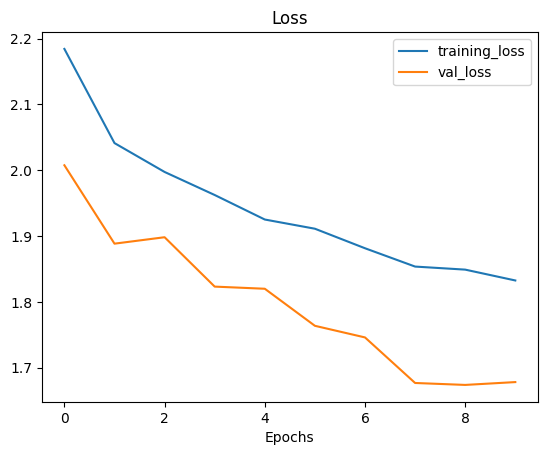

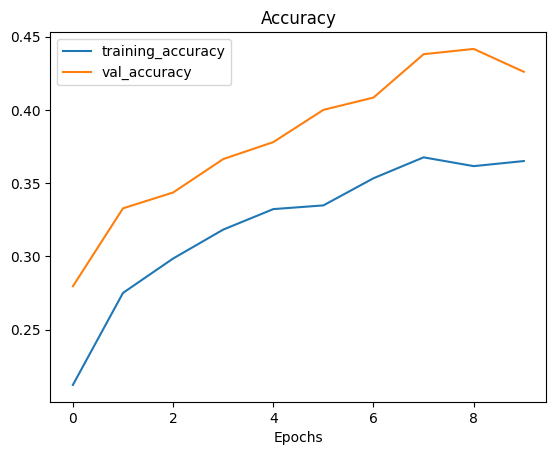

In [129]:
plot_loss_curves(history8)

In [130]:
model8.evaluate(test_data)

79/79 [==============================] - 8s 103ms/step - loss: 1.6780 - accuracy: 0.4260


[1.6779953241348267, 0.4259999990463257]

In [131]:
model8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

## Improving the model

In [132]:
model9=tf.keras.Sequential()
model9.add(tf.keras.layers.Conv2D(filters=32,
                                  kernel_size=3,
                                  activation="relu",
                                  input_shape=(224,224,3)))
model9.add(tf.keras.layers.Conv2D(32,3,activation="relu"))
model9.add(tf.keras.layers.MaxPool2D(pool_size=2))
model9.add(tf.keras.layers.Conv2D(32,3,activation="relu"))
model9.add(tf.keras.layers.Conv2D(32,3,activation="relu"))
model9.add(tf.keras.layers.MaxPool2D(pool_size=2))
model9.add(tf.keras.layers.Flatten())
model9.add(tf.keras.layers.Dense(len(class_names), activation="softmax"))

model9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history9=model9.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 137s 563ms/step - loss: 2.2046 - accuracy: 0.2011 - val_loss: 2.0148 - val_accuracy: 0.2896
Epoch 2/10
235/235 [==============================] - 108s 461ms/step - loss: 2.0822 - accuracy: 0.2551 - val_loss: 1.9978 - val_accuracy: 0.2780
Epoch 3/10
235/235 [==============================] - 111s 472ms/step - loss: 2.0210 - accuracy: 0.2835 - val_loss: 1.9153 - val_accuracy: 0.3392
Epoch 4/10
235/235 [==============================] - 109s 463ms/step - loss: 1.9810 - accuracy: 0.3092 - val_loss: 1.8258 - val_accuracy: 0.3784
Epoch 5/10
235/235 [==============================] - 112s 475ms/step - loss: 1.9542 - accuracy: 0.3172 - val_loss: 1.7943 - val_accuracy: 0.3824
Epoch 6/10
235/235 [==============================] - 114s 485ms/step - loss: 1.9383 - accuracy: 0.3241 - val_loss: 1.8942 - val_accuracy: 0.3576
Epoch 7/10
235/235 [==============================] - 111s 470ms/step - loss: 1.8862 - accuracy: 0.3509 - val_loss: 1.7371 -

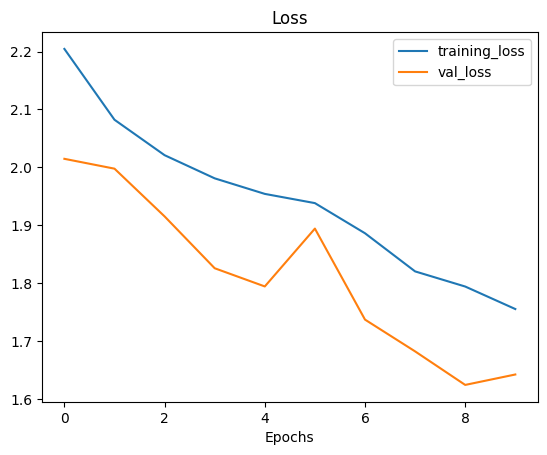

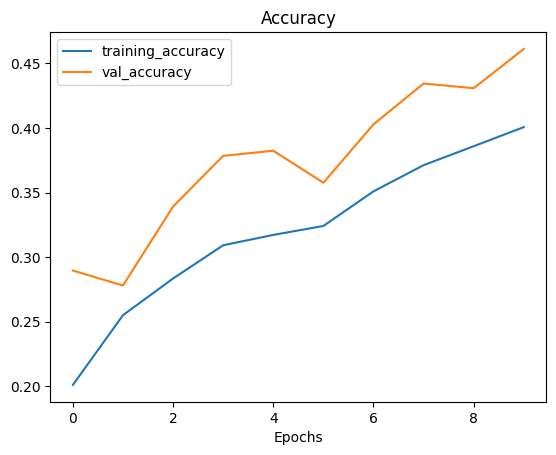

In [133]:
plot_loss_curves(history9)

In [134]:
model9.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 1.6423 - accuracy: 0.4612


[1.6422683000564575, 0.4611999988555908]

In [135]:
model10=tf.keras.Sequential()
model10.add(tf.keras.layers.Conv2D(filters=32,
                                  kernel_size=3,
                                  activation="relu",
                                  input_shape=(224,224,3)))
model10.add(tf.keras.layers.Conv2D(32,3,activation="relu"))
model10.add(tf.keras.layers.MaxPool2D(pool_size=2))
model10.add(tf.keras.layers.Conv2D(32,3,activation="relu"))
model10.add(tf.keras.layers.Conv2D(32,3,activation="relu"))
model10.add(tf.keras.layers.MaxPool2D(pool_size=2))
model10.add(tf.keras.layers.Conv2D(32,3,activation="relu"))
model10.add(tf.keras.layers.Conv2D(32,3,activation="relu"))
model10.add(tf.keras.layers.MaxPool2D(pool_size=2))
model10.add(tf.keras.layers.Flatten())
model10.add(tf.keras.layers.Dense(len(class_names), activation="softmax"))

model10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history10=model10.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 118s 485ms/step - loss: 2.2054 - accuracy: 0.1807 - val_loss: 2.0332 - val_accuracy: 0.2620
Epoch 2/10
235/235 [==============================] - 112s 478ms/step - loss: 2.0818 - accuracy: 0.2523 - val_loss: 1.9726 - val_accuracy: 0.3080
Epoch 3/10
235/235 [==============================] - 111s 471ms/step - loss: 2.0371 - accuracy: 0.2823 - val_loss: 1.8470 - val_accuracy: 0.3720
Epoch 4/10
235/235 [==============================] - 108s 461ms/step - loss: 1.9633 - accuracy: 0.3112 - val_loss: 1.7544 - val_accuracy: 0.4068
Epoch 5/10
235/235 [==============================] - 111s 474ms/step - loss: 1.8925 - accuracy: 0.3408 - val_loss: 1.7664 - val_accuracy: 0.3864
Epoch 6/10
235/235 [==============================] - 110s 466ms/step - loss: 1.8444 - accuracy: 0.3697 - val_loss: 1.6162 - val_accuracy: 0.4612
Epoch 7/10
235/235 [==============================] - 110s 469ms/step - loss: 1.7861 - accuracy: 0.3968 - val_loss: 1.6673 -

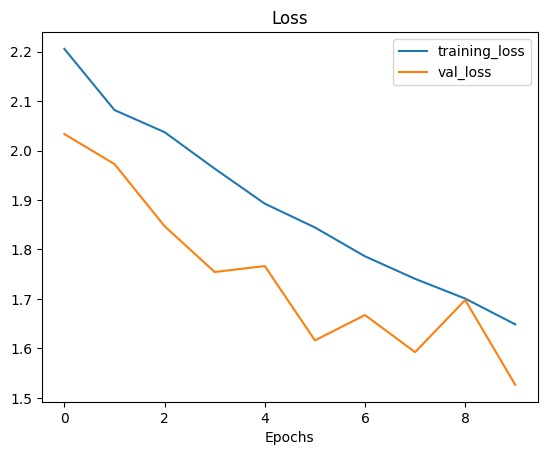

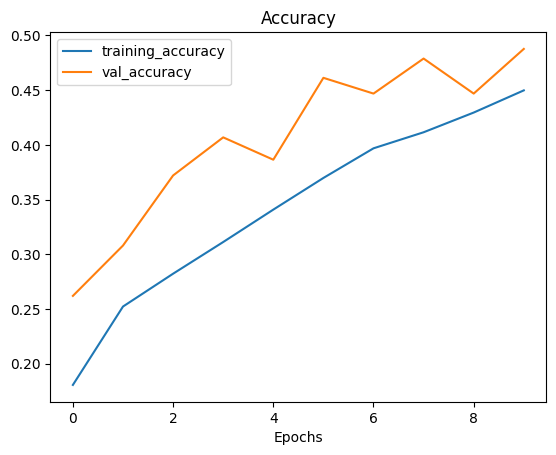

In [136]:
plot_loss_curves(history10)

In [137]:
model10.evaluate(test_data)

79/79 [==============================] - 8s 105ms/step - loss: 1.5261 - accuracy: 0.4876


[1.5260730981826782, 0.4875999987125397]

In [139]:
model11=tf.keras.models.clone_model(model10) # clones instance of model10 without any learnt params

In [140]:
model11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_28 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_30 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                

In [141]:
model10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_28 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_30 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                

In [142]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

## Making prediction

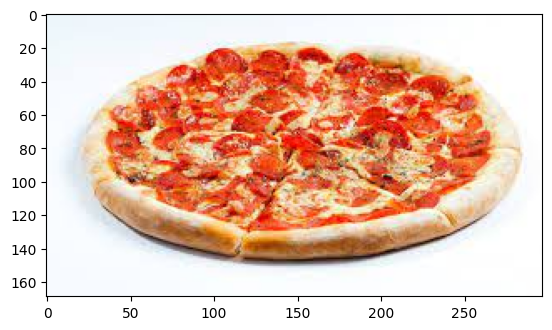

In [143]:
img=mpimg.imread("pizza.jpeg")
plt.imshow(img)

In [146]:
img=load_and_prep("pizza.jpeg")

In [148]:
pred=model10.predict(tf.expand_dims(img, axis=0))

1/1 [==============================] - 0s 32ms/step


In [151]:
pred

array([[7.7928030e-03, 8.1283640e-04, 1.6891011e-03, 1.2741356e-02,
        1.3320507e-03, 3.5062430e-03, 9.6286523e-01, 7.8291766e-04,
        7.2832900e-04, 7.7491268e-03]], dtype=float32)

In [152]:
class_names[pred.argmax()]

'pizza'

1/1 [==============================] - 0s 37ms/step


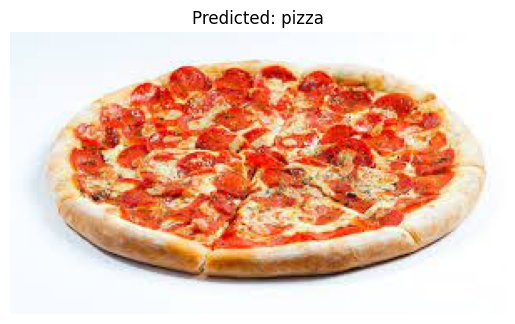

In [154]:
pred_and_plot(model10, "pizza.jpeg", class_names=(class_names))

## Saving and loading model

In [155]:
model10.save("CNN_10_classes")

In [157]:
loaded_model=tf.keras.models.load_model("CNN_10_classes")

1/1 [==============================] - 0s 65ms/step


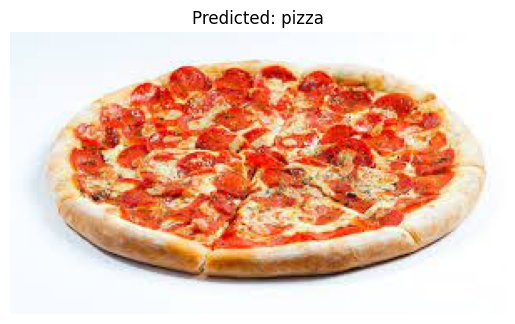

In [159]:
pred_and_plot(loaded_model, "pizza.jpeg", class_names=class_names)